In [1075]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from sklearn.preprocessing import OrdinalEncoder # for converting categorical features to discrete numerical values

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1076]:
df = pd.read_csv(path)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Identify categorical and numerical features

In [1077]:
cols = df.columns

num_cols = df._get_numeric_data().columns.to_list()
print(num_cols)

# get complement of set of columns and numerical columns
cat_cols = list(set(cols) - set(num_cols))
print(cat_cols)

['math score', 'reading score', 'writing score']
['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'gender']


# Display mode, median of categorical variables/features

['group C', 'group D', 'group B', 'group E', 'group A']
<BarContainer object of 5 artists>
race/ethnicity
['some college', "associate's degree", 'high school', 'some high school', "bachelor's degree", "master's degree"]
<BarContainer object of 6 artists>
parental level of education
['standard', 'free/reduced']
<BarContainer object of 2 artists>
lunch
['none', 'completed']
<BarContainer object of 2 artists>
test preparation course
['female', 'male']
<BarContainer object of 2 artists>
gender


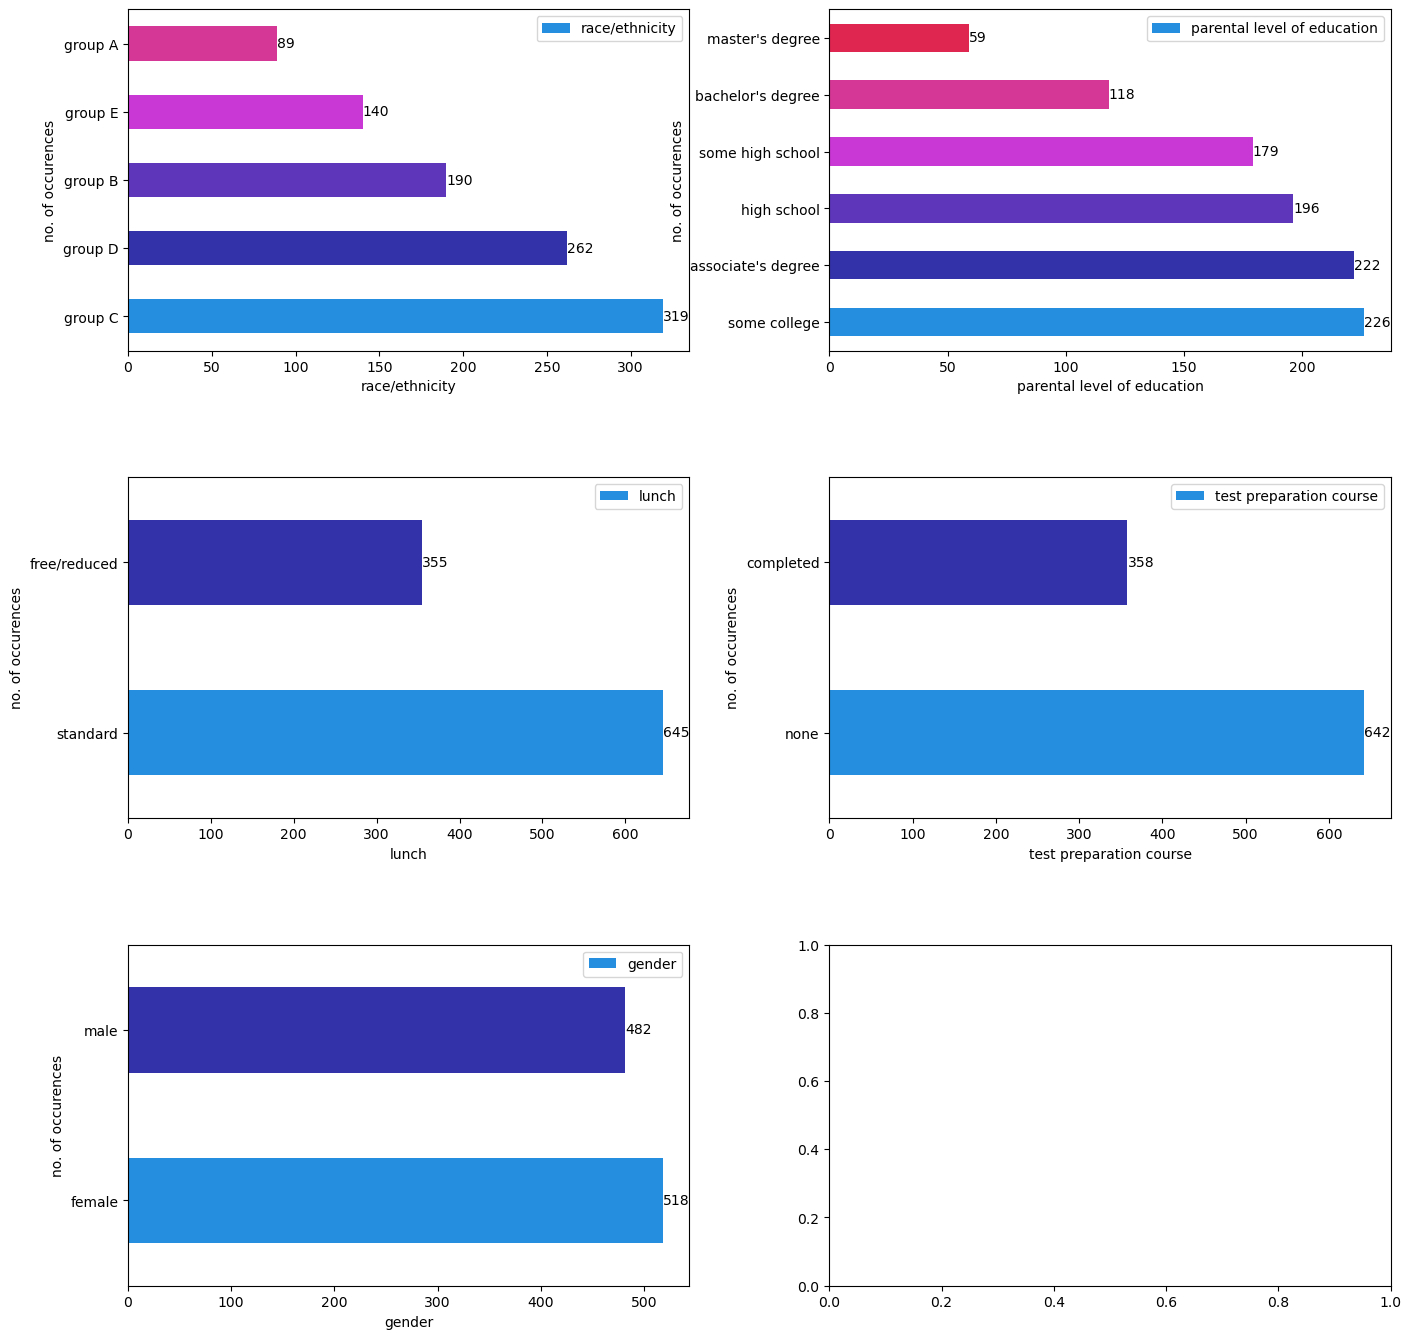

In [1078]:
def disp_cat_feat():
    fig, axes = plt.subplots(3, 2, figsize=(15, 15), gridspec_kw={'width_ratios': [3, 3], 'height_ratios': [5, 5, 5]})
    axes = axes.flat
    fig.tight_layout(pad=7)

    for index, col in enumerate(cat_cols):
        keys = list(df[col].value_counts().keys())
        print(keys)

        # list all categorical columns no of occurences of each of their unique values
        ax = df[col].value_counts().plot(kind='barh', ax=axes[index], color=['#268ede', '#3432a8', '#5e36ba', '#c937d4', '#d43795', '#de2651'])

        # annotate bars using axis.containers[0] since it contains
        # all 
        print(ax.containers[0])
        ax.bar_label(ax.containers[0])
        ax.set_ylabel('no. of occurences')
        ax.set_xlabel(col)
        ax.legend()

        # current column
        print(col)

    plt.show()
    
disp_cat_feat()

## convert nominal/categorical features to ordinal features
1. check also if in each column the number of categories still stay the same

In [1079]:
oe = OrdinalEncoder()
df_t = oe.fit_transform(df[cat_cols])
df_t

array([[1., 1., 1., 1., 0.],
       [2., 4., 1., 0., 0.],
       [1., 3., 1., 1., 0.],
       ...,
       [2., 2., 0., 0., 0.],
       [3., 4., 1., 0., 0.],
       [3., 4., 0., 1., 0.]])

In [1080]:
unique, freq = np.unique(df_t[:, 0], return_counts=True)
unique, freq

(array([0., 1., 2., 3., 4.]), array([ 89, 190, 319, 262, 140]))

In [1081]:
for cat in cat_cols:
    df[cat] = oe.fit_transform(np.array(df[cat]).reshape(-1, 1))
    

In [1082]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,1.0,1.0,1.0,1.0,72,72,74
1,0.0,2.0,4.0,1.0,0.0,69,90,88
2,0.0,1.0,3.0,1.0,1.0,90,95,93
3,1.0,0.0,0.0,0.0,1.0,47,57,44
4,1.0,2.0,4.0,1.0,1.0,76,78,75
...,...,...,...,...,...,...,...,...
995,0.0,4.0,3.0,1.0,0.0,88,99,95
996,1.0,2.0,2.0,0.0,1.0,62,55,55
997,0.0,2.0,2.0,0.0,0.0,59,71,65
998,0.0,3.0,4.0,1.0,0.0,68,78,77


## check if there are also any null/missing values in the dataframe

In [1083]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Display standard deviation, variance, and mean of numerical variables/features math score, reading score, writing score

In [1084]:
# calculate mean of writing score, reading score, and math score

num_cols_desc = df.describe()
print(num_cols_desc)

math_median = df['math score'].median()
read_median = df['reading score'].median()
write_median = df['writing score'].median()

            gender  race/ethnicity  parental level of education        lunch  \
count  1000.000000     1000.000000                  1000.000000  1000.000000   
mean      0.482000        2.174000                     2.486000     0.645000   
std       0.499926        1.157179                     1.829522     0.478753   
min       0.000000        0.000000                     0.000000     0.000000   
25%       0.000000        1.000000                     1.000000     0.000000   
50%       0.000000        2.000000                     2.000000     1.000000   
75%       1.000000        3.000000                     4.000000     1.000000   
max       1.000000        4.000000                     5.000000     1.000000   

       test preparation course  math score  reading score  writing score  
count              1000.000000  1000.00000    1000.000000    1000.000000  
mean                  0.642000    66.08900      69.169000      68.054000  
std                   0.479652    15.16308      14.600

## calculate interquartile range of numerical variables

In [1085]:
_75_p = num_cols_desc.loc['75%', ['math score', 'reading score', 'writing score']]
print(f'{_75_p}\n')

_25_p = num_cols_desc.loc['25%', ['math score', 'reading score', 'writing score']]
print(f'{_25_p}\n')

# calculate interquartile range of each numerical variable
iqr = _75_p - _25_p
print(f'interquartile range of each feature:\n{iqr}\n')

math score       77.0
reading score    79.0
writing score    79.0
Name: 75%, dtype: float64

math score       57.00
reading score    59.00
writing score    57.75
Name: 25%, dtype: float64

interquartile range of each feature:
math score       20.00
reading score    20.00
writing score    21.25
dtype: float64



## find upper bound and lower bound without the outliers

In [1086]:
upper_bound = _75_p + (1.5 * iqr)
lower_bound = _25_p - (1.5 * iqr)
print(f'lower bounds/whiskers are:\n{lower_bound}\n')
print(f'upper bounds/whiskers are:\n{upper_bound}')

lower bounds/whiskers are:
math score       27.000
reading score    29.000
writing score    25.875
dtype: float64

upper bounds/whiskers are:
math score       107.000
reading score    109.000
writing score    110.875
dtype: float64


## once upper and lower bounds have been calculated anything **greater or lesser** than these bounds respectively are the outliers

In [1087]:
math_outliers = df.loc[(df['math score'] <= lower_bound['math score']) | (df['math score'] >= upper_bound['math score']),'math score']
math_outliers

17     18
59      0
91     27
145    22
338    24
363    27
466    26
787    19
842    23
980     8
Name: math score, dtype: int64

In [1088]:
read_outliers = df.loc[(df['reading score'] <= lower_bound['reading score']) | (df['reading score'] >= upper_bound['reading score']),'reading score']
read_outliers

59     17
76     26
211    28
327    23
596    24
601    29
896    29
980    24
Name: reading score, dtype: int64

In [1089]:
write_outliers = df.loc[(df['writing score'] <= lower_bound['writing score']) | (df['writing score'] >= upper_bound['writing score']),'writing score']
write_outliers

59     10
76     22
327    19
596    15
980    23
Name: writing score, dtype: int64

As we can see in our revealed outliers we observe that the outliers occur mostly on the left side of the distribution meaning it is postively skewed

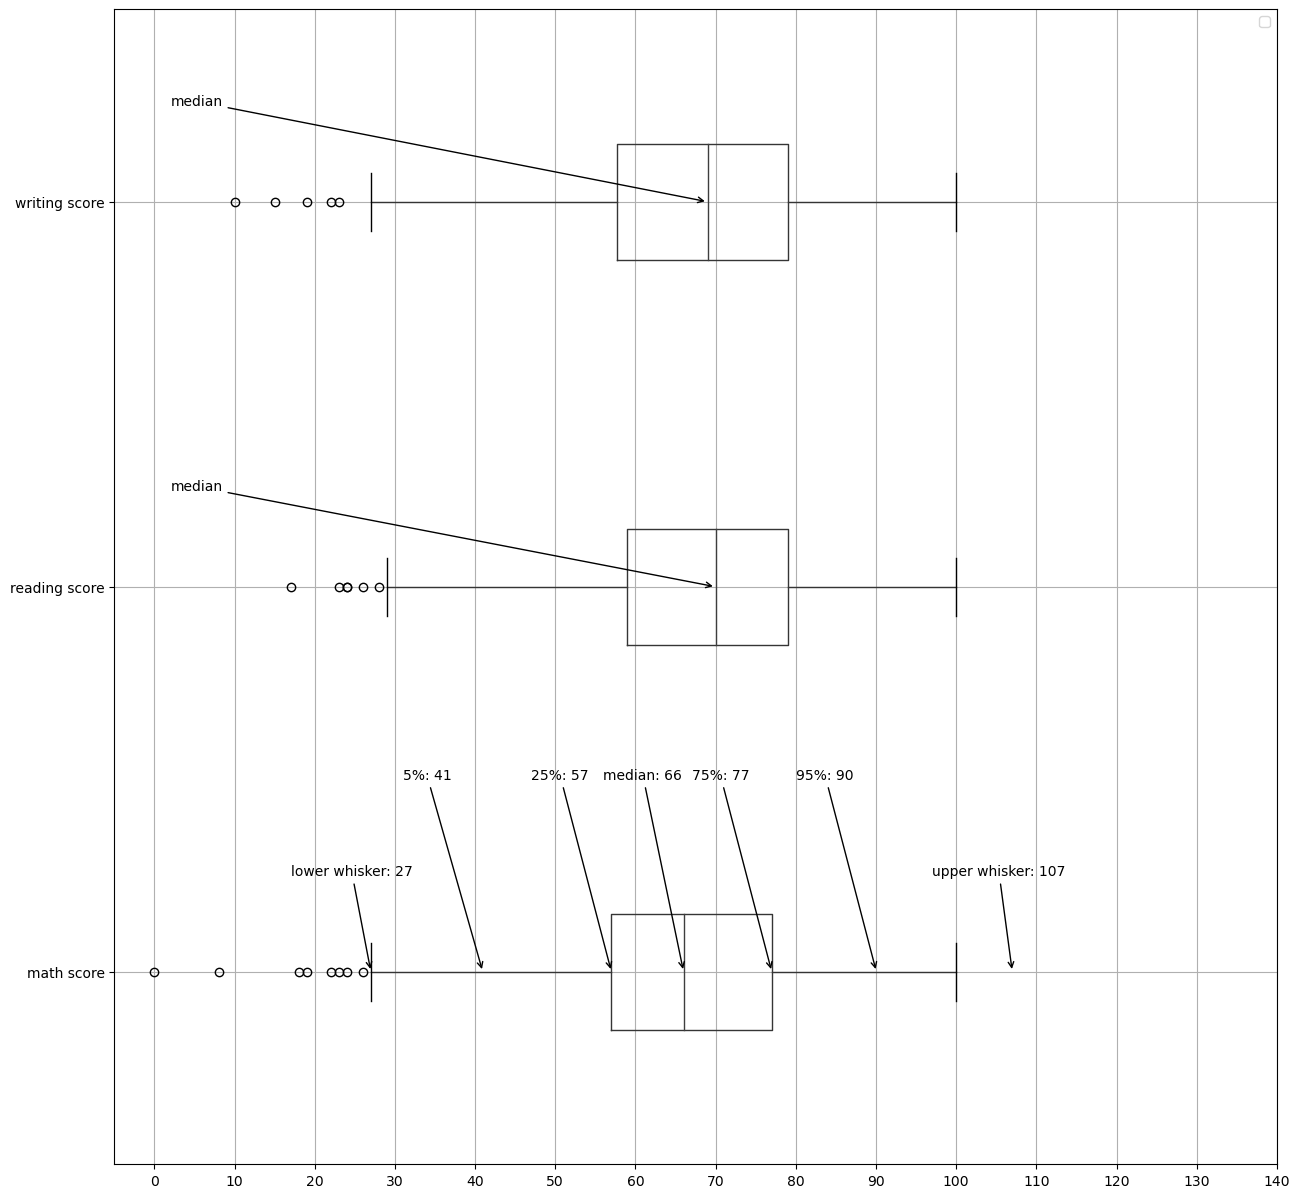

In [1090]:
axis = df.boxplot(column=num_cols, vert=False, figsize=(15, 15))

xy = {
    'math': {
        'median': math_median,
        '75%': num_cols_desc.loc['75%', 'math score'],
        '25%': num_cols_desc.loc['25%', 'math score'],
        '95%': np.quantile(df['math score'], .95),
        '5%': np.quantile(df['math score'], .05),
        'lower whisker': lower_bound['math score'],
        'upper whisker': upper_bound['math score']
    },
    'reading': {
        'median': read_median,
    },
    'writing': {
        'median': write_median,
    }
}

# shifts the 
offset = -10

arrowprops = {
    'arrowstyle': '->'
}


# for math
axis.annotate('median: {}'.format(round(xy['math']['median']), 2), xy=(xy['math']['median'], 1), xytext=(xy['math']['median'] + offset, 1.5), arrowprops=arrowprops)
axis.annotate('75%: {}'.format(round(xy['math']['75%']), 2), xy=(xy['math']['75%'], 1), xytext=(xy['math']['75%'] + offset, 1.5), arrowprops=arrowprops)
axis.annotate('25%: {}'.format(round(xy['math']['25%']), 2), xy=(xy['math']['25%'], 1), xytext=(xy['math']['25%'] + offset, 1.5), arrowprops=arrowprops)
axis.annotate('95%: {}'.format(round(xy['math']['95%']), 2), xy=(xy['math']['95%'], 1), xytext=(xy['math']['95%'] + offset, 1.5), arrowprops=arrowprops)
axis.annotate('5%: {}'.format(round(xy['math']['5%']), 2), xy=(xy['math']['5%'], 1), xytext=(xy['math']['5%'] + offset, 1.5), arrowprops=arrowprops)
axis.annotate('lower whisker: {}'.format(round(xy['math']['lower whisker']), 2), xy=(xy['math']['lower whisker'], 1), xytext=(xy['math']['lower whisker'] + offset, 1.25), arrowprops=arrowprops)
axis.annotate('upper whisker: {}'.format(round(xy['math']['upper whisker']), 2), xy=(xy['math']['upper whisker'], 1), xytext=(xy['math']['upper whisker'] + offset, 1.25), arrowprops=arrowprops)

# for reading
axis.annotate('median', xy=(xy['reading']['median'], 2), xytext=(2, 2.25), arrowprops=arrowprops)

# for writing
axis.annotate('median', xy=(xy['writing']['median'], 3), xytext=(2, 3.25), arrowprops=arrowprops)


tick_range = 150
plt.xticks([i for i in range(0, tick_range) if i % 10 == 0])
# plt.grid()

# plt.gca().margins(x=0)
# plt.gcf().canvas.draw()
# tl = plt.gca().get_xticklabels()
# maxsize = max([t.get_window_extent().width for t in tl])
# m = 0.2 # inch margin
# s = maxsize / plt.gcf().dpi * tick_range + 2 * m
# margin = m / plt.gcf().get_size_inches()[0]

# plt.gcf().subplots_adjust(left=margin, right=1. - margin)
# plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])


plt.legend()
plt.show()

# Compare two features with one another

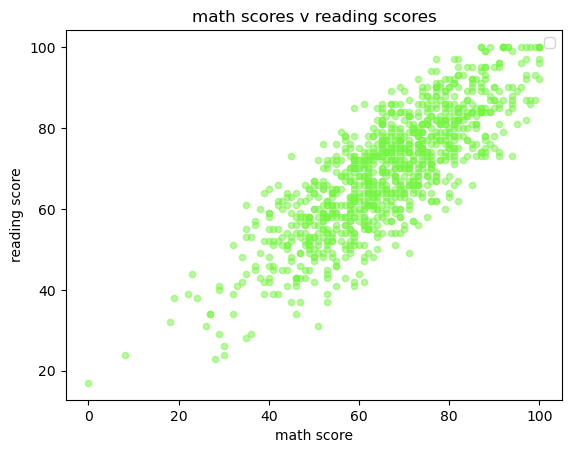

In [1091]:
ax = df.plot(kind='scatter', x='math score', y='reading score', color='#75f542', alpha=0.5, title='math scores v reading scores')
ax.legend()
plt.show()

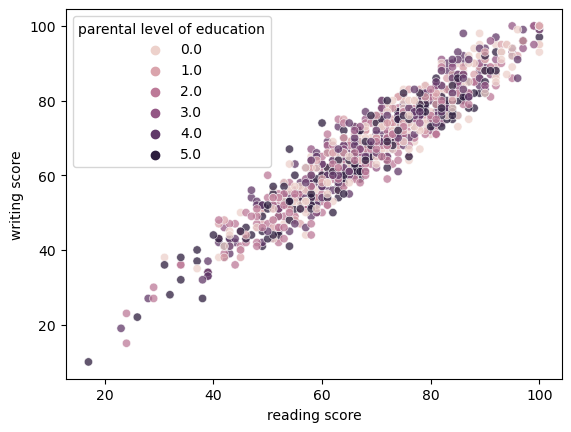

In [1092]:
# plot 3 variables x, y, z where x, y still remain on their axes, but z 
# represents different colors of different value of the third variable
# see if there is a correlation to reading and writing with level of education of parents
sb.set_palette('rocket')
sb.scatterplot(x='reading score', y='writing score', hue='parental level of education', alpha=0.75, data=df)
plt.show()

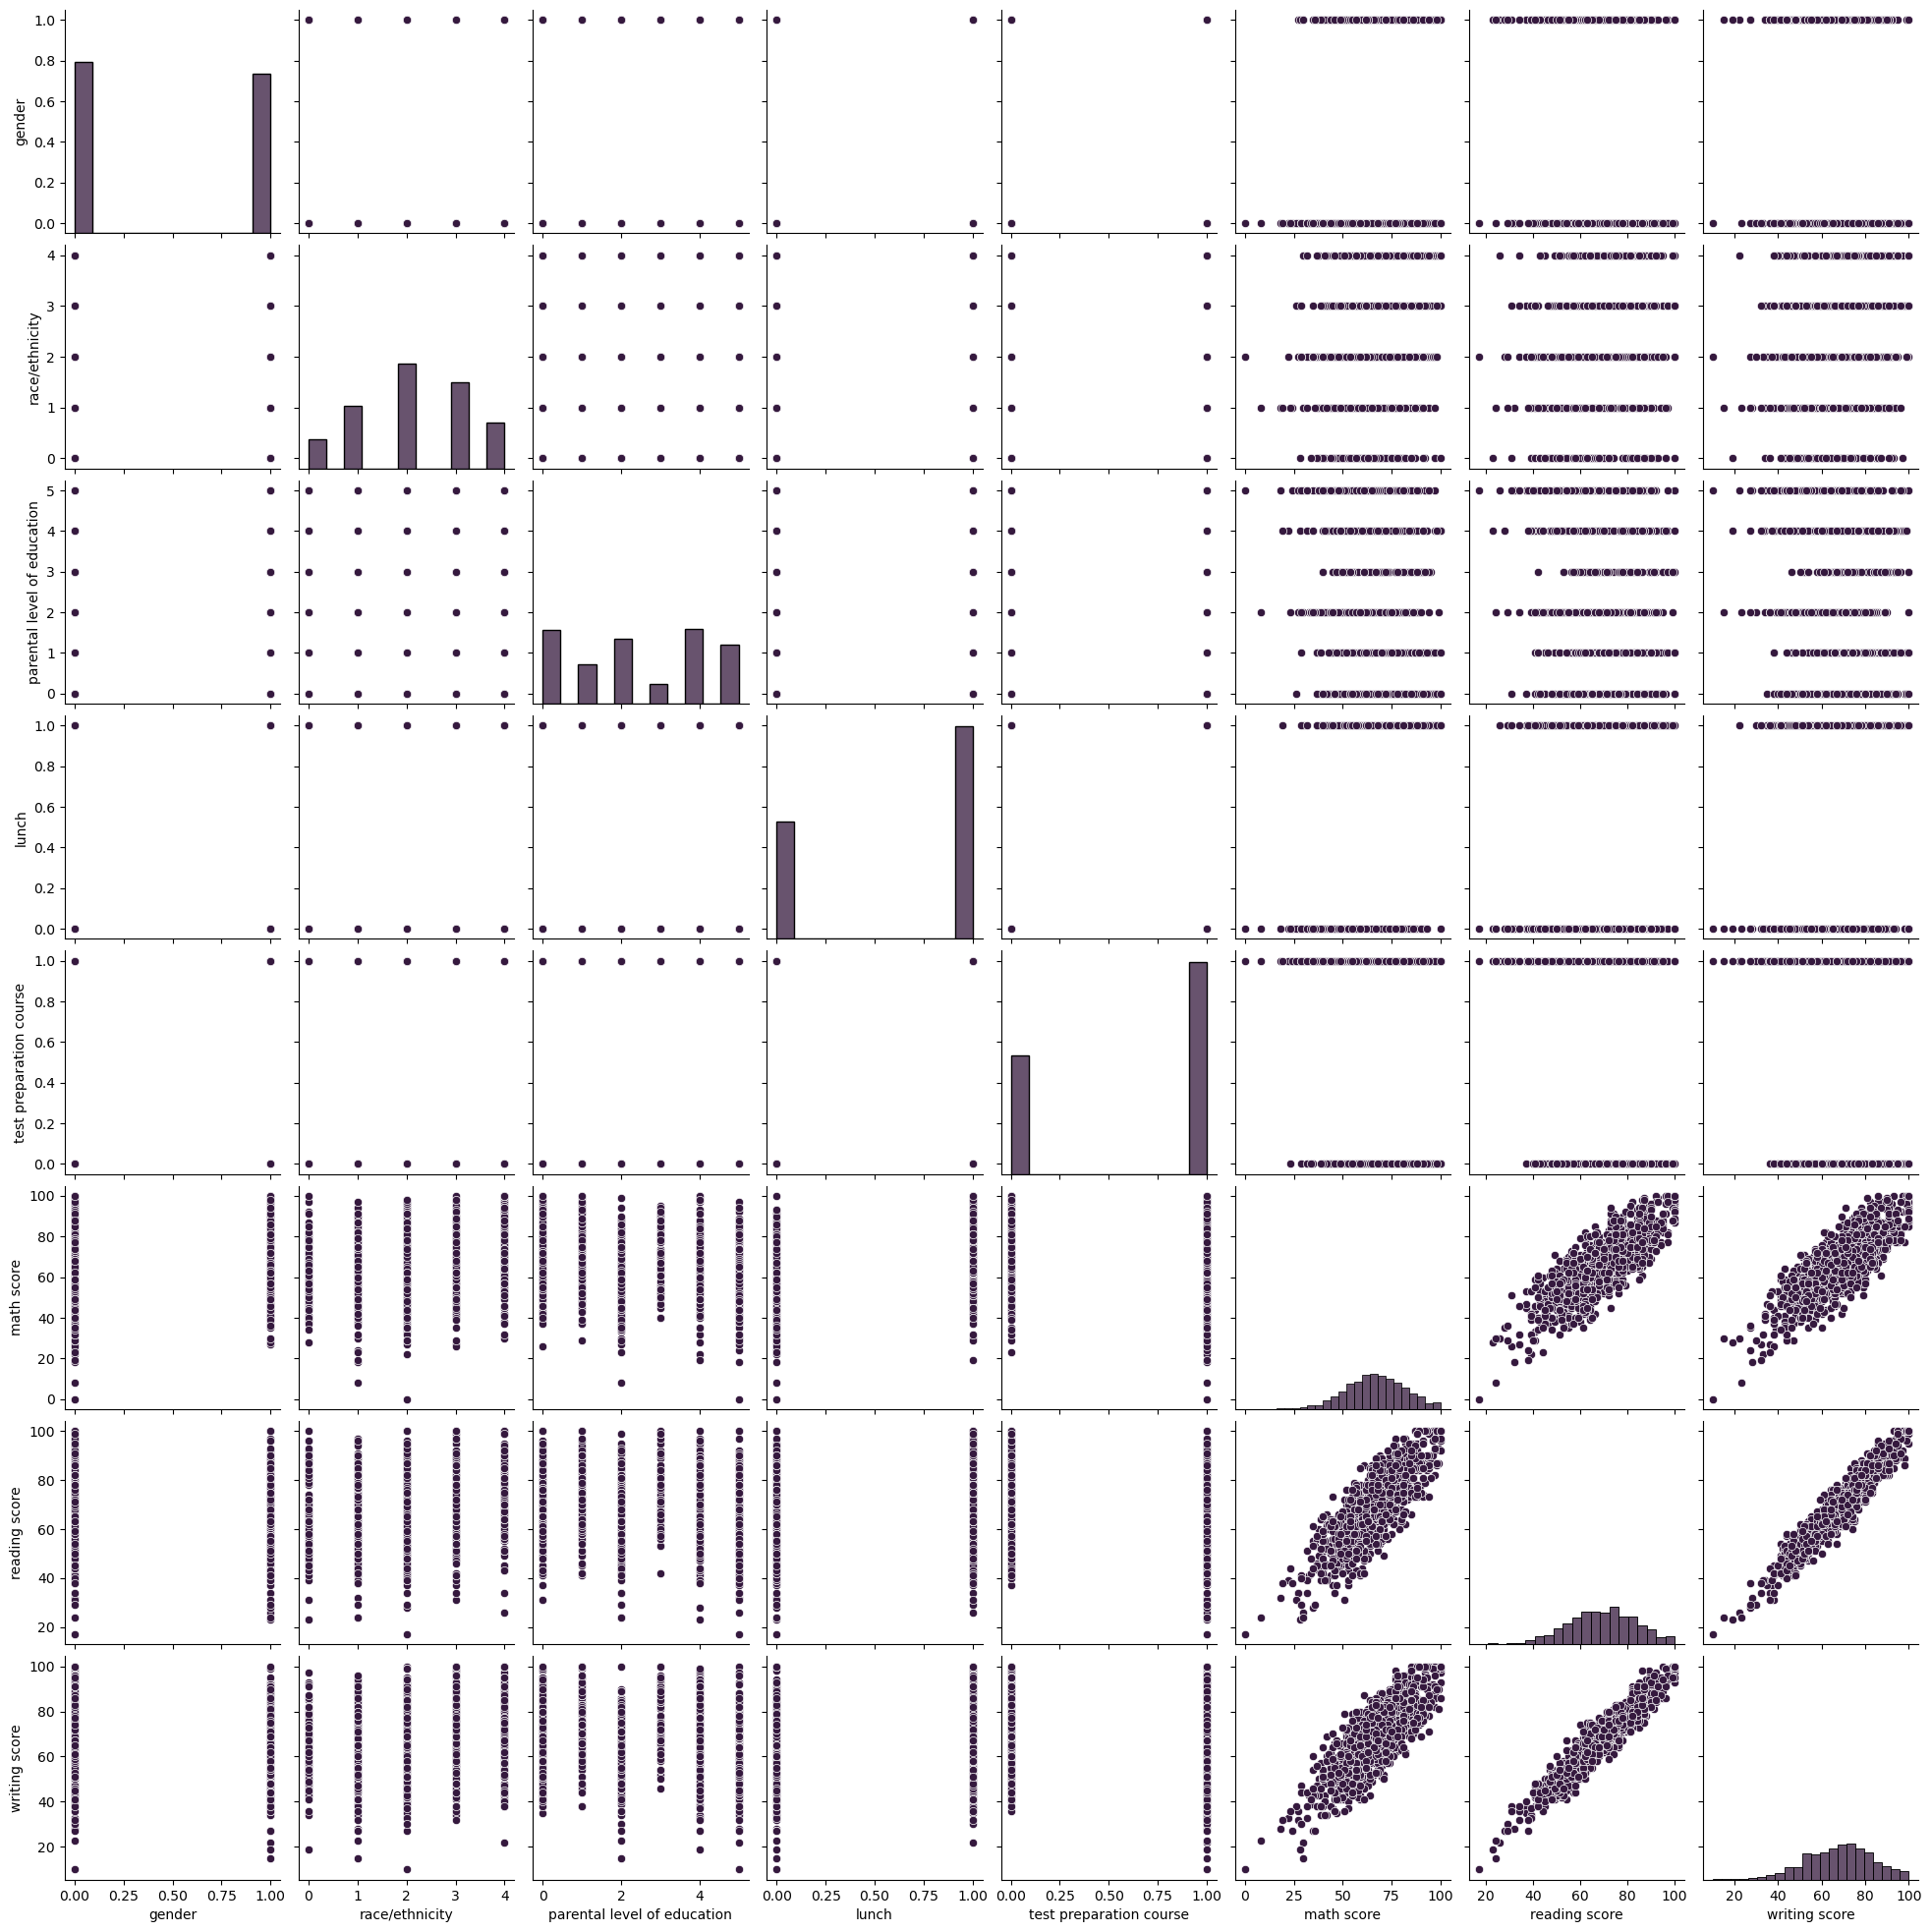

In [1093]:
sb.set_palette('rocket')
sb.pairplot(df)
plt.show()

## Seeing both categorical and numerical features of the dataset, it can be deduced that:
- in the numerical features there are indeed known outliers in which the rows which indeed contain these outliers can either be dropped/removed altogether as if it were a data point not worthy of our time
- transformed into a much more useful value without having to waste a data point which could be even beneficial perhaps in training a predictive model using either logarithmic, cubic root, square root transformation, or mean normalization.
- in the categorical features test preparation course, lunch, race/ethnicity, gender, parental level of education we see that in each feature the most frequently occuring values are none, standard, group C, female, and some college respectively
- 

## However the first question that should be asked before even attempting to follow the first method of dealing with outliers in our data is where such data points even came from? Was there a purpose? Was it a naturally occuring minority? Or simply just a human error?
- because numerical features are naturally occuring and not a mere human error, transformation via log, square root, or mean normalization which implies it ought to be within/forced into the inter quartile range, it would be counter productive, because naturally occuring values, can simply be just removed and not forced into a vlaue which it is not
- the solution for the outliers in this case would simply be to remove them

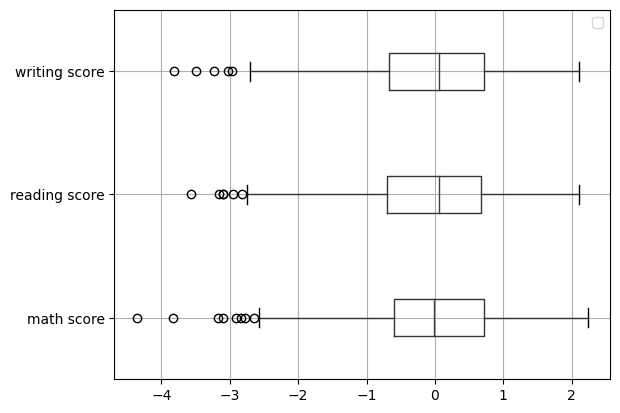

In [1094]:
# transforming using log
df['math score'] = df['math score'].apply(lambda score: (score - df['math score'].mean()) / df['math score'].std())
df['writing score'] = df['writing score'].apply(lambda score: (score - df['writing score'].mean()) / df['writing score'].std())
df['reading score'] = df['reading score'].apply(lambda score: (score - df['reading score'].mean()) / df['reading score'].std())

# plot the numerical columns with outliers again
df.boxplot(column=num_cols, vert=False)
plt.legend()
plt.show()

In [1095]:
df['math score']

0      0.389828
1      0.191979
2      1.576922
3     -1.258913
4      0.653627
         ...   
995    1.445023
996   -0.269668
997   -0.467517
998    0.126030
999    0.719577
Name: math score, Length: 1000, dtype: float64

# see correlations between each variable

In [1096]:
df_corr = df.corr()
df_corr

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.001502,0.001913,0.021372,-0.006028,0.167982,-0.244313,-0.301225
race/ethnicity,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.216415,0.145253,0.165691
parental level of education,0.001913,-0.031946,1.000000,0.006320,-0.023968,-0.068279,-0.072444,-0.084299
lunch,0.021372,0.046563,0.006320,1.000000,0.017044,0.350877,0.229560,0.245769
test preparation course,-0.006028,-0.017508,-0.023968,0.017044,1.000000,-0.177702,-0.241780,-0.312946
math score,0.167982,0.216415,-0.068279,0.350877,-0.177702,1.000000,0.817580,0.802642
reading score,-0.244313,0.145253,-0.072444,0.229560,-0.241780,0.817580,1.000000,0.954598
writing score,-0.301225,0.165691,-0.084299,0.245769,-0.312946,0.802642,0.954598,1.000000


<AxesSubplot:>

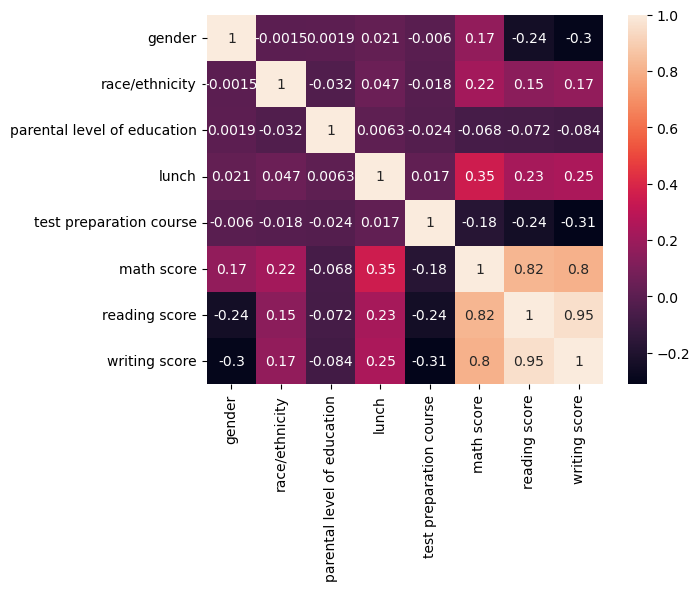

In [1097]:
sb.set_palette('mako')
sb.heatmap(df_corr, annot=True)